# Netflix Movies and TV Shows Analysis

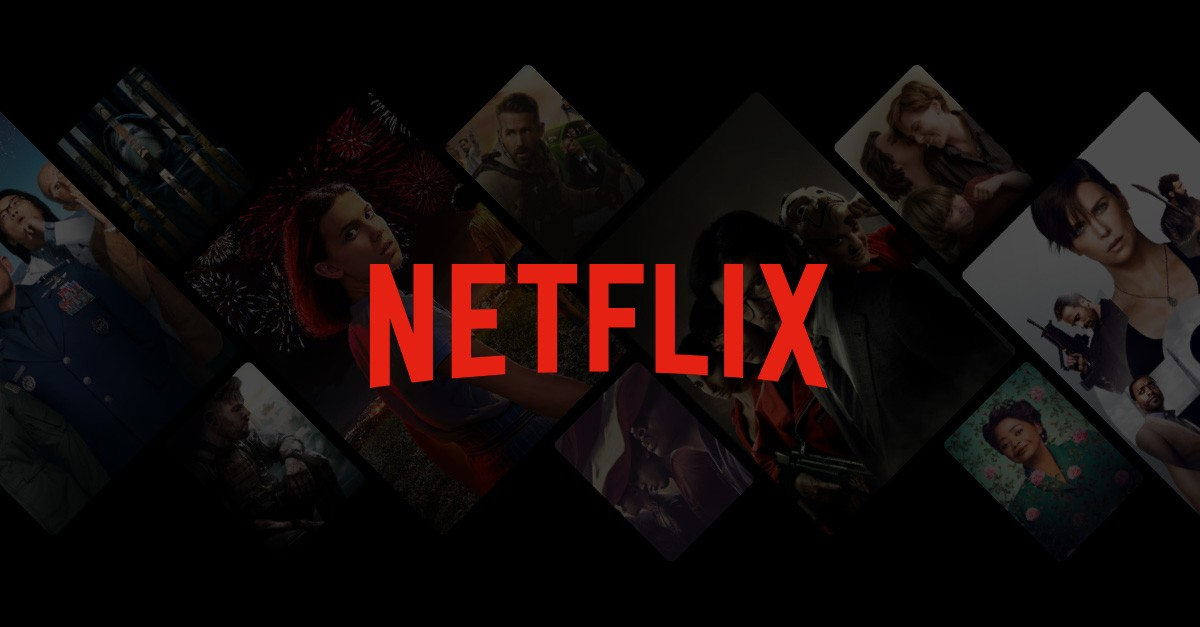

In [ ]:
#Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib
from textblob import TextBlob
from PIL import Image

In [ ]:
#Loading file
from google.colab import files
uploaded=files.upload()

Saving netflix.csv to netflix (2).csv


In [ ]:
#Loading first picture
from google.colab import files
uploaded=files.upload()

Saving Netflix_logo2.png to Netflix_logo2.png


In [ ]:
#Loading second picture
from google.colab import files
uploaded=files.upload()

Saving Netflix_logo2.png to Netflix_logo2.png


In [ ]:
#Reading File
netflix = pd.read_csv('netflix.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#First 5 rows of the dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Checking the numbers of rows and columns
netflix.shape

(8807, 12)

So the data consists of 8807 rows and 12 columns, now we will look at the column names:

In [ ]:
#List down all the columns name
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Information about dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Generate summary statistics of numerical columns in the DataFrame
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<Axes: >

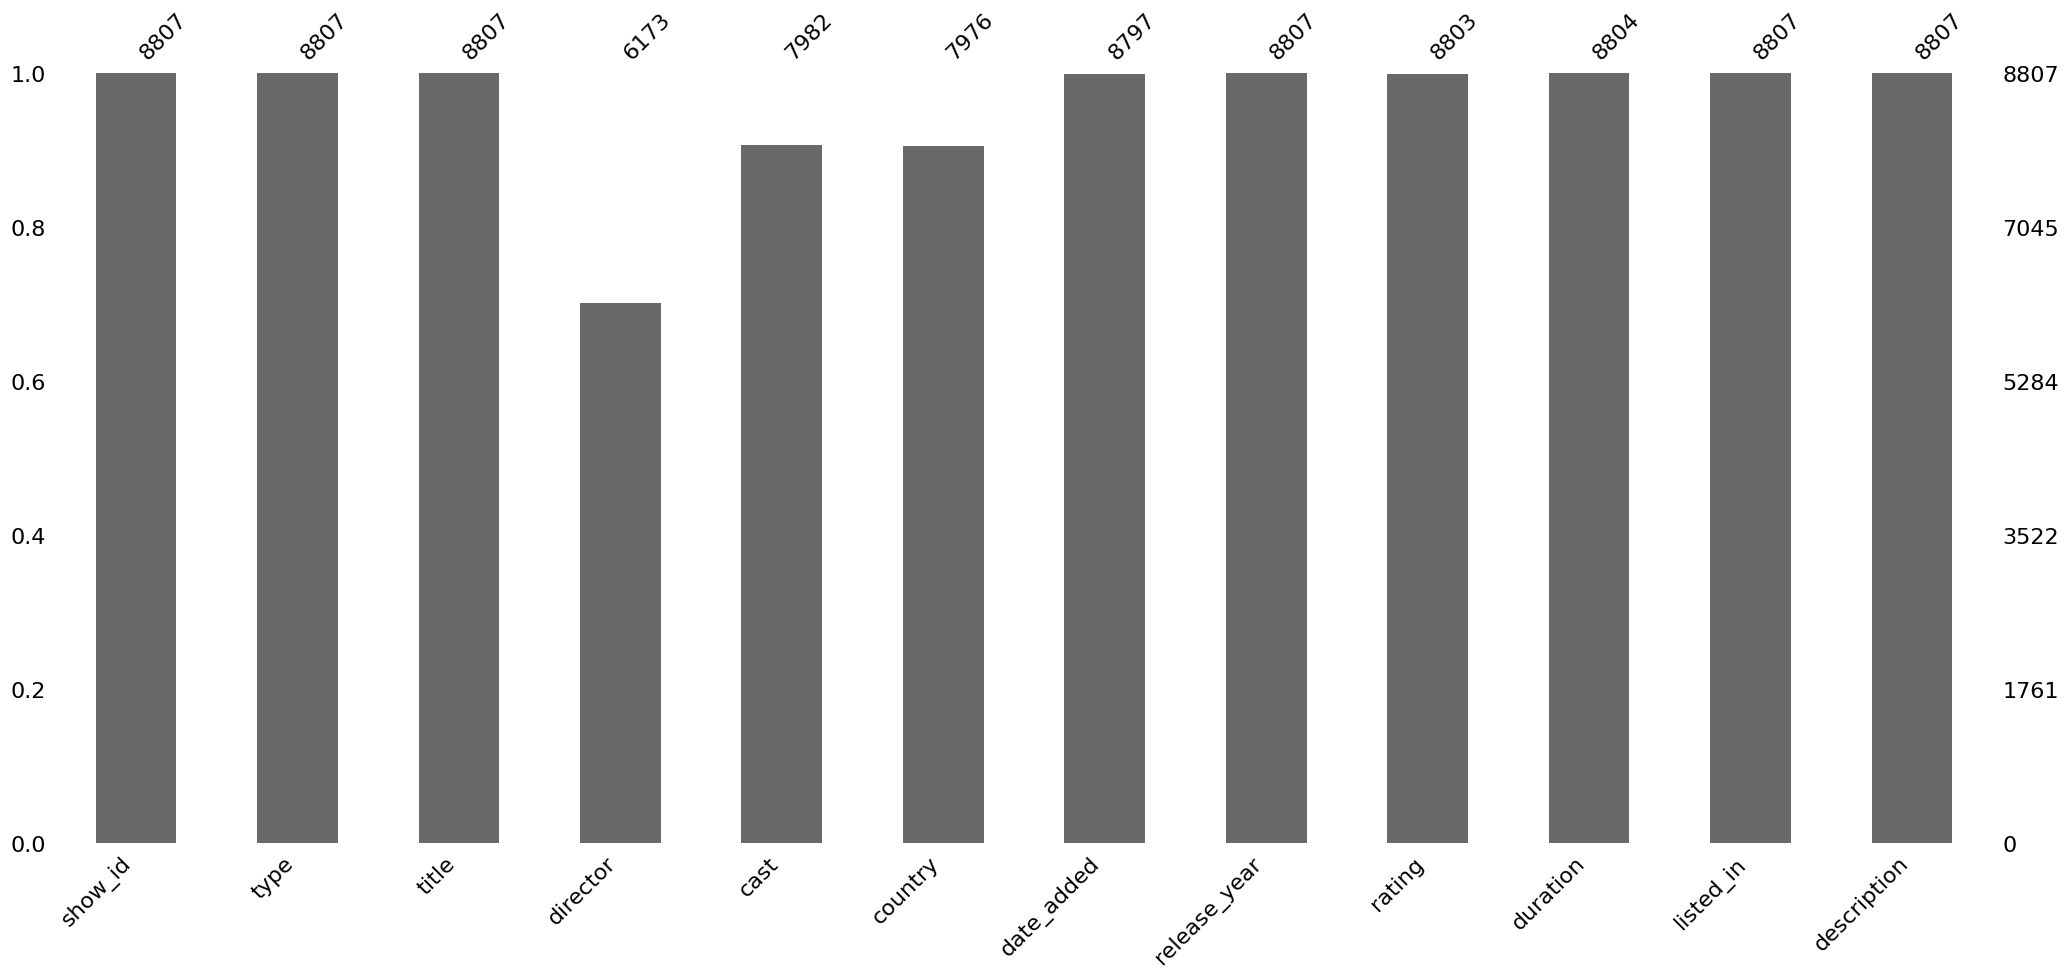

In [ ]:
msn.bar(netflix)

In [ ]:
netflix["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

<Axes: xlabel='type', ylabel='count'>

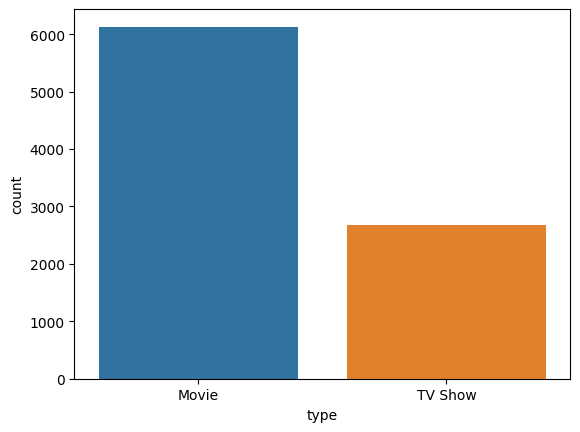

In [ ]:
sns.countplot(x=netflix['type'],data=netflix)

In [ ]:
#Checking for null values in dataset
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

As we can see that in the Director, cast, Country, Date_added, Rating and Duration columns has null values so, we will show this with the help of heatmap.

<Axes: >

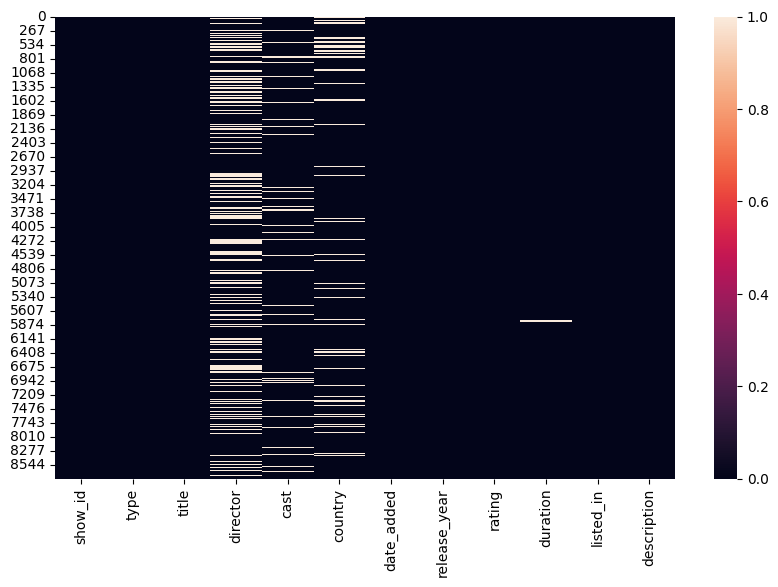

In [ ]:
#Using heat-map to show null value count
plt.figure(figsize=[10,6])
sns.heatmap(netflix.isnull())

**Cleaning the null values**

In [ ]:
netflix['country']=netflix['country'].fillna('Not specified')
netflix['cast']=netflix['cast'].fillna('Data not available')
netflix['director']=netflix['director'].fillna('Data not available')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,Not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Data not available,Data not available,Not specified,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Now onto analysis-
First let us see the time frame of the data

In [ ]:
netflix['release_year'].median()

2017.0

In [ ]:
print(min(netflix["release_year"]))
print(max(netflix["release_year"]))

1925
2021


In [ ]:
netflix["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
dict2=netflix['release_year'].value_counts().to_dict()
x1=list(dict2.keys())
y1=list(dict2.values())
fig4=px.bar(dict2.keys(),x1,y1,text_auto='.2s',title='Content released from 1925 to 2021',labels={'x': 'Release Year', 'y':'Content'})
fig4.update_traces(marker_color='#FF00FF',textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig4.show()

Let's analyze the trend of content production over the years on Netflix:

In [ ]:
df1=netflix[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2000]
fig = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig.show()

Let's analyze the sentiment of content on Netflix:

In [ ]:
dfx=netflix[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent
dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
dfx=dfx[dfx['Release Year']>=2005]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

Let's look at the distribution of content ratings on Netflix:

In [ ]:
netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
for i in range(len(netflix['rating'])):
  if netflix['rating'][i]=='74 min' or netflix['rating'][i]=='66 min' or netflix['rating'][i]=='84 min':
    netflix['rating'][i]='Not specified'

<ipython-input-67-43d1b48c6dd6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#The distribution of content ratings on Netflix
z = netflix.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating',
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

The pie chart above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

Now let’s see the top 10 successful directors on this platform:

<ipython-input-18-366a6d2e4c75>:24: MatplotlibDeprecationWarning:

hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "0". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.



<BarContainer object of 10 artists>

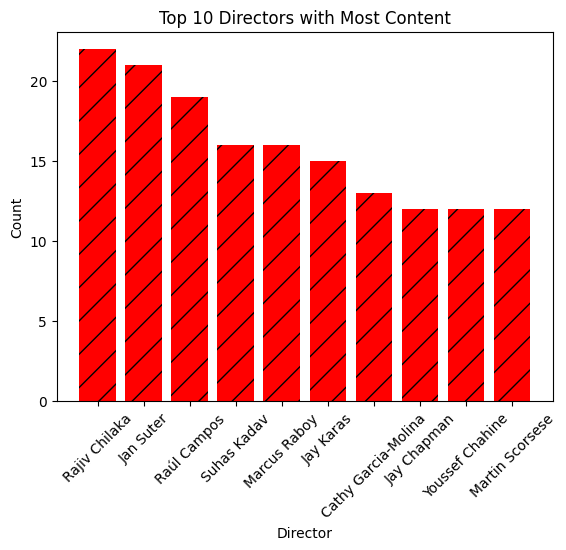

In [ ]:
filtered_director=pd.DataFrame(netflix['director'])
for i in range(len(filtered_director)):
  if type(filtered_director['director'][i])==str:
   filtered_director['director'][i]=filtered_director['director'][i].split(', ')

director_list=[]
for i in range(len(filtered_director['director'])):
  if type(filtered_director['director'][i])==list:
    for j in range(len(filtered_director['director'][i])):
      director_list.append(filtered_director['director'][i][j])
filtered_director_list=pd.DataFrame(director_list).value_counts().head(10)
dict4=filtered_director_list.to_dict()

dict4_keys=list(dict4.keys())
for i in range(len(dict4_keys)):
  dict4_keys[i]=dict4_keys[i][0]

x=list(dict4_keys)
y=list(dict4.values())
plt.title('Top 10 Directors with Most Content')
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Count')
plt.bar(x,y,color='red',hatch=['0/'])

From the above graph it is derived that the top 5 directors on this platform are:
1. Rajiv Chilaka
2. Jan Suter
3. Raul Campos
4. Marcus Raboy
5. Suhas Kadav

Now let’s have a look at the top 10 successful actors and actress on this platform:

<BarContainer object of 10 artists>

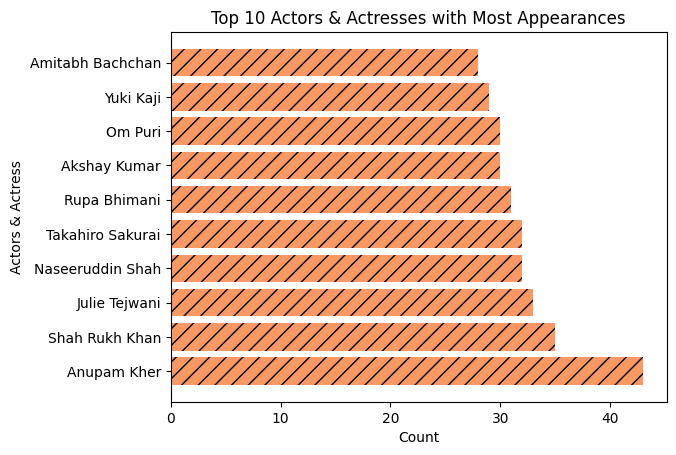

In [ ]:
filtered_cast=pd.DataFrame(netflix['cast'])
for i in range(len(filtered_cast)):
  if type(filtered_cast['cast'][i])==str:
   filtered_cast['cast'][i]=filtered_cast['cast'][i].split(', ')

cast_list=[]
for i in range(len(filtered_cast['cast'])):
  if type(filtered_cast['cast'][i])==list:
    for j in range(len(filtered_cast['cast'][i])):
      cast_list.append(filtered_cast['cast'][i][j])
filtered_cast_list=pd.DataFrame(cast_list).value_counts().head(10)
dict2=filtered_cast_list.to_dict()

dict2_keys=list(dict2.keys())
for i in range(len(dict2_keys)):
  dict2_keys[i]=dict2_keys[i][0]

x=list(dict2_keys)
y=list(dict2.values())
plt.xlabel('Count')
plt.ylabel('Actors & Actress')
plt.title('Top 10 Actors & Actresses with Most Appearances')
plt.barh(x,y,color='#F89963',hatch=['//'])

From the above graph it is derived that the top 5 actors & actress on this platform are:
1. Anupam Kher
2. Shah Rukh Khan
3. Julie Tejwani
4. Naseeruddin Shah
5. Takahiro Sakurai

Let's visualize the types of categories of contents:

In [ ]:
filtered_listedin=pd.DataFrame(netflix['listed_in'])
for i in range(len(filtered_listedin)):
  if type(filtered_listedin['listed_in'][i])==str:
   filtered_listedin['listed_in'][i]=filtered_listedin['listed_in'][i].split(', ')

listedin_list=[]
for i in range(len(filtered_listedin['listed_in'])):
  if type(filtered_listedin['listed_in'][i])==list:
    for j in range(len(filtered_listedin['listed_in'][i])):
      listedin_list.append(filtered_listedin['listed_in'][i][j])
filtered_listedin_list=pd.DataFrame(listedin_list).value_counts()
dict6=filtered_listedin_list.to_dict()

dict6_keys=list(dict6.keys())
for i in range(len(dict6_keys)):
  dict6_keys[i]=dict6_keys[i][0]

x=list(dict6_keys)
y=list(dict6.values())
fig7=px.bar(dict6_keys,x,y,text_auto='.2s',title='Content Catagories', labels={'x': 'Catagories', 'y':'Content'})
fig7.update_traces(marker_color='#800080',textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig7.show()

Let’s visualize histogram displaying countries:

In [ ]:
netflix['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [ ]:
filtered_country=pd.DataFrame(netflix['country'])
for i in range(len(filtered_country)):
  if type(filtered_country['country'][i])==str:
   filtered_country['country'][i]=filtered_country['country'][i].split(', ')

country_list=[]
for i in range(len(filtered_country['country'])):
  if type(filtered_country['country'][i])==list:
    for j in range(len(filtered_country['country'][i])):
      country_list.append(filtered_country['country'][i][j])

filtered_country_list=pd.DataFrame(country_list).value_counts()
dict3=filtered_country_list.to_dict()

dict3_keys=list(dict3.keys())
for i in range(len(dict3_keys)):
  dict3_keys[i]=dict3_keys[i][0]
x=list(dict3_keys)
y=list(dict3.values())
fig6=px.bar(dict3_keys,x[:50],y[:50],text_auto='.2s',title='Distribution of Movies & TV shows Countrywise', labels={'x': 'Countries', 'y':'Total Movies & Tv shows'})
fig6.update_traces(marker_color='#FDD017',textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig6.show()

In [ ]:
fig6=px.bar(dict3_keys,x[:50],y[:50], title='Distribution of Movies & TV shows Countrywise')
fig6=px.bar(dict3_keys, x=list(dict3_keys), y=list(dict3.values()), color= pd.Series('green', index=range(len(dict3_keys))), title='Distribution of Movies & TV shows Countrywise')

Let's visualize average duration of contents:

<ipython-input-35-c21e07ac7dd8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



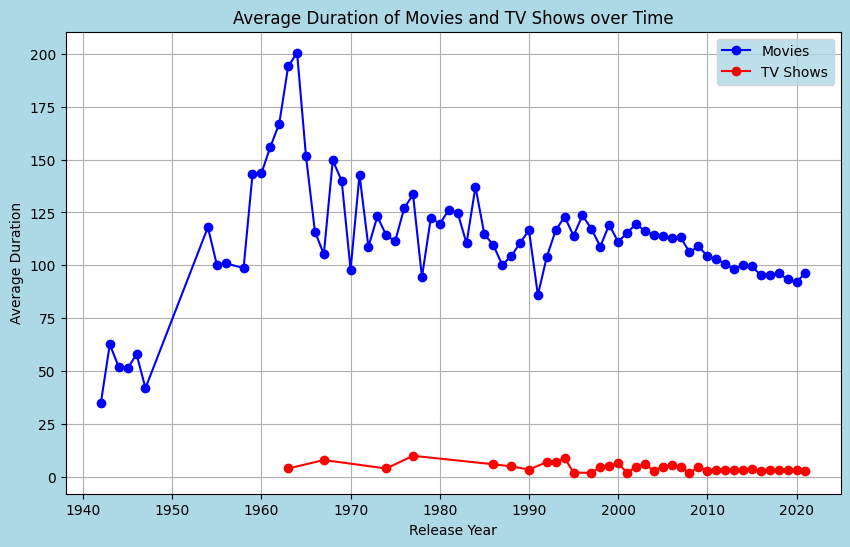

In [ ]:
# Filter out rows with 'Movie' or 'TV Show' type
movies_data = netflix[netflix['type'] == 'Movie']
tv_shows_data = netflix[netflix['type'] == 'TV Show']

# Convert 'duration' column to numeric for movies
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)

# Remove rows with '1 Season' duration for TV shows
tv_shows_data = tv_shows_data[~tv_shows_data['duration'].str.contains('1 Season')]

# Convert 'duration' column to numeric for TV shows
tv_shows_data['duration'] = tv_shows_data['duration'].str.replace(' Seasons', '').astype(int)

# Group data by 'release_year' and calculate average duration
avg_movies_duration = movies_data.groupby('release_year')['duration'].mean().reset_index()
avg_tv_shows_duration = tv_shows_data.groupby('release_year')['duration'].mean().reset_index()

# Plot average duration over time for movies and TV shows
plt.figure(figsize=(10, 6),facecolor='#ADD8E6')
plt.plot(avg_movies_duration['release_year'], avg_movies_duration['duration'], marker='o', linestyle='-', color='blue', label='Movies')
plt.plot(avg_tv_shows_duration['release_year'], avg_tv_shows_duration['duration'], marker='o', linestyle='-', color='red', label='TV Shows')

plt.xlabel('Release Year')
plt.ylabel('Average Duration')
plt.title('Average Duration of Movies and TV Shows over Time')
plt.legend(facecolor="#ADD8E6")
plt.grid(True)
plt.show()

We will create a word cloud from the titles of the content:

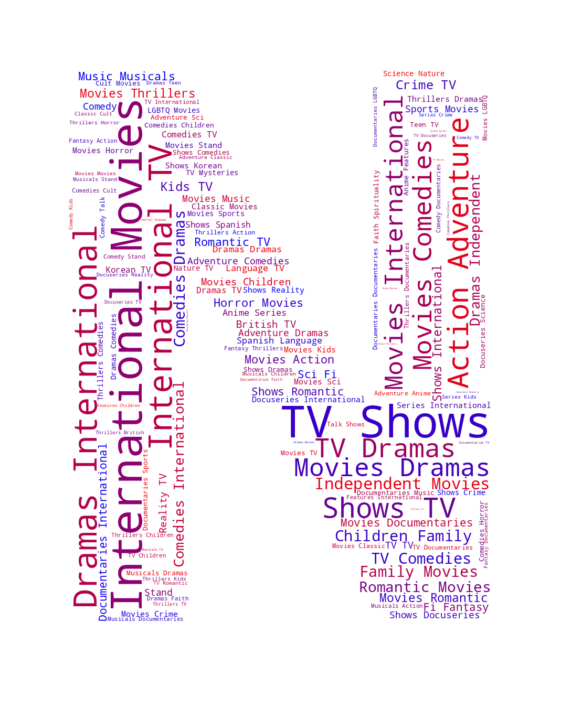

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'red'])
text = str(list(netflix['listed_in'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('Netflix_logo1.png'))
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 500,colormap=cmap, max_words = 160, mask = mask).generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

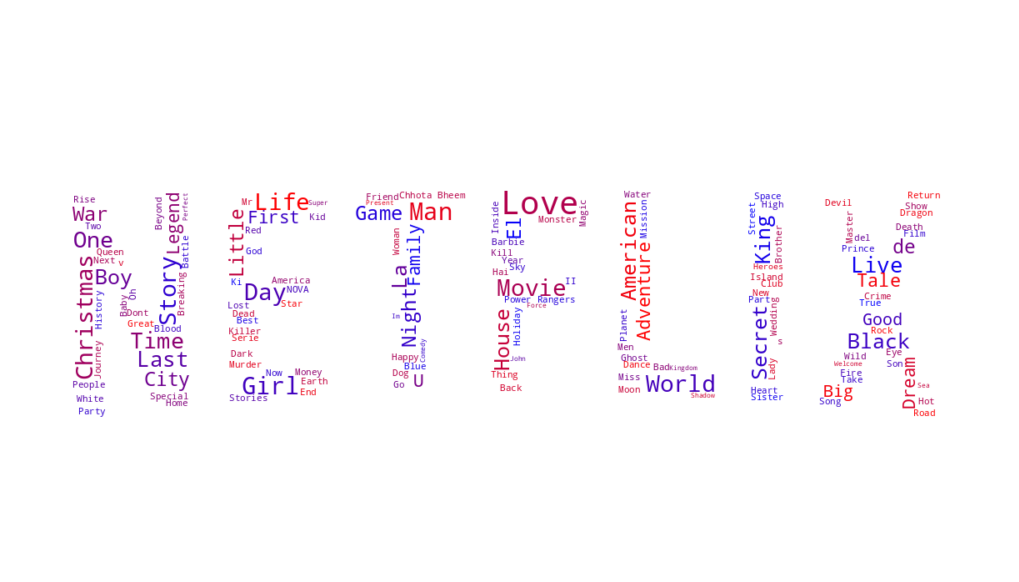

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['blue', 'red'])
text = str(list(netflix['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('Netflix_logo2.png'))
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 500,colormap=cmap, max_words = 150, mask = mask).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

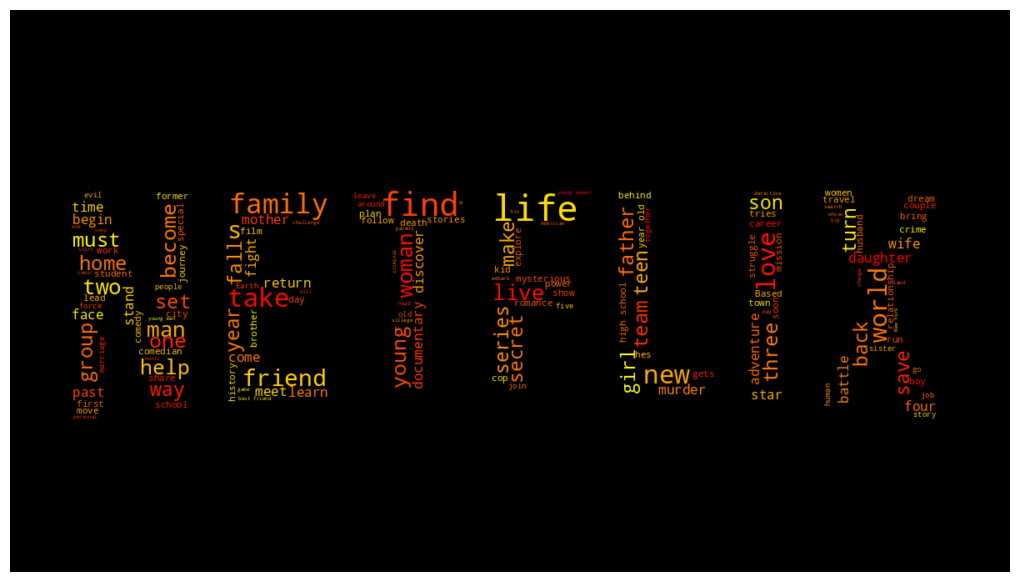

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow'])
text = str(list(netflix['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('Netflix_logo2.png'))
wordcloud = WordCloud(background_color = 'black', width = 500,  height = 500,colormap=cmap, max_words = 150, mask = mask).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

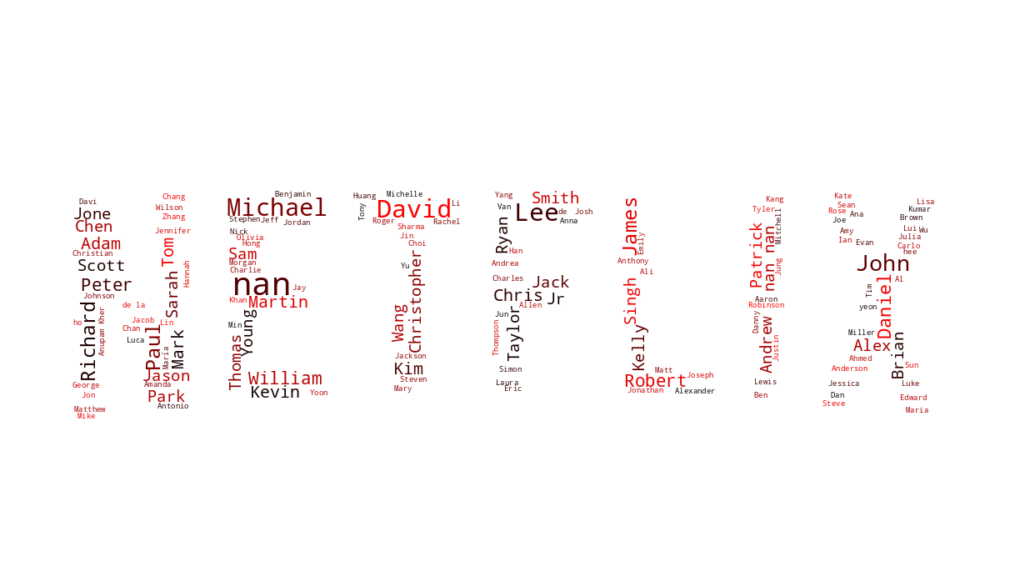

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'black'])
text = str(list(netflix['cast'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('Netflix_logo2.png'))
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 500,colormap=cmap, max_words = 150, mask = mask).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **THANK YOU**